Histogram and BS Confidence Lower Bound Check

0.409372424215837


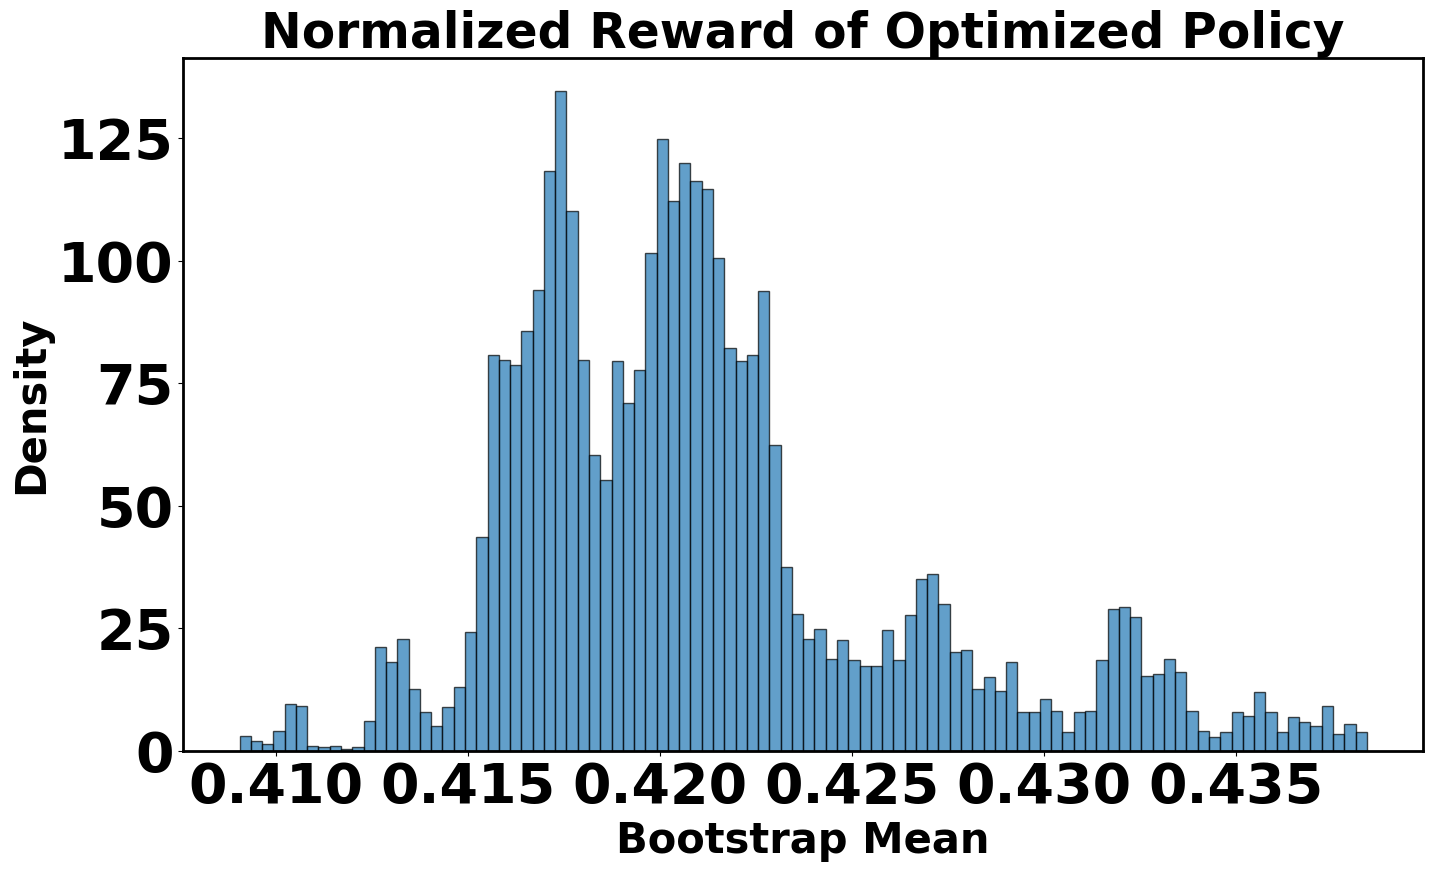

In [ ]:
import numpy as np
import scipy.stats as stats
import tqdm
import os
import matplotlib.pyplot as plt
# plt.rcParams['mathtext.fontset'] = 'stix'
# plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['font.size'] = 40
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.linewidth"] = 2


base_return_list = np.loadtxt("./return_list.txt")
evaluation_return_list = np.loadtxt("./return_list.txt")
up_b = np.max(base_return_list)
low_b = np.min(base_return_list)


# Normalize returns using baseline min and max
def normalize(returns, up_b, low_b):
    return (returns - low_b) / (up_b - low_b)


sample = normalize(evaluation_return_list, up_b, low_b)
print(np.mean(sample))

# Parameters
n_bootstrap = 10000  # Number of bootstrap samples
n_samples = 600000  # Size of each bootstrap sample (same as original dataset)

# Perform bootstrap resampling
bootstrap_means = []
for _ in range(n_bootstrap):
    sample = np.random.choice(sample, size=n_samples, replace=True)  # Resample with replacement
    bootstrap_means.append(np.mean(sample))

# Convert to NumPy array for convenience
bootstrap_means = np.array(bootstrap_means)

# Plot the bootstrap distributions
plt.hist(bootstrap_means, bins=100, density=True, alpha=0.7, edgecolor='k')
# plt.axvline(lower_bound, color='red', linestyle='--', label=f'90% Lower Bound: {lower_bound:.3f}')
plt.xlabel('Bootstrap Mean', weight='bold',fontsize=30)
plt.ylabel('Density',weight='bold',fontsize=30)
plt.title('Normalized Reward of Optimized Policy', weight='bold',fontsize=35)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
# plt.legend()
plt.show()


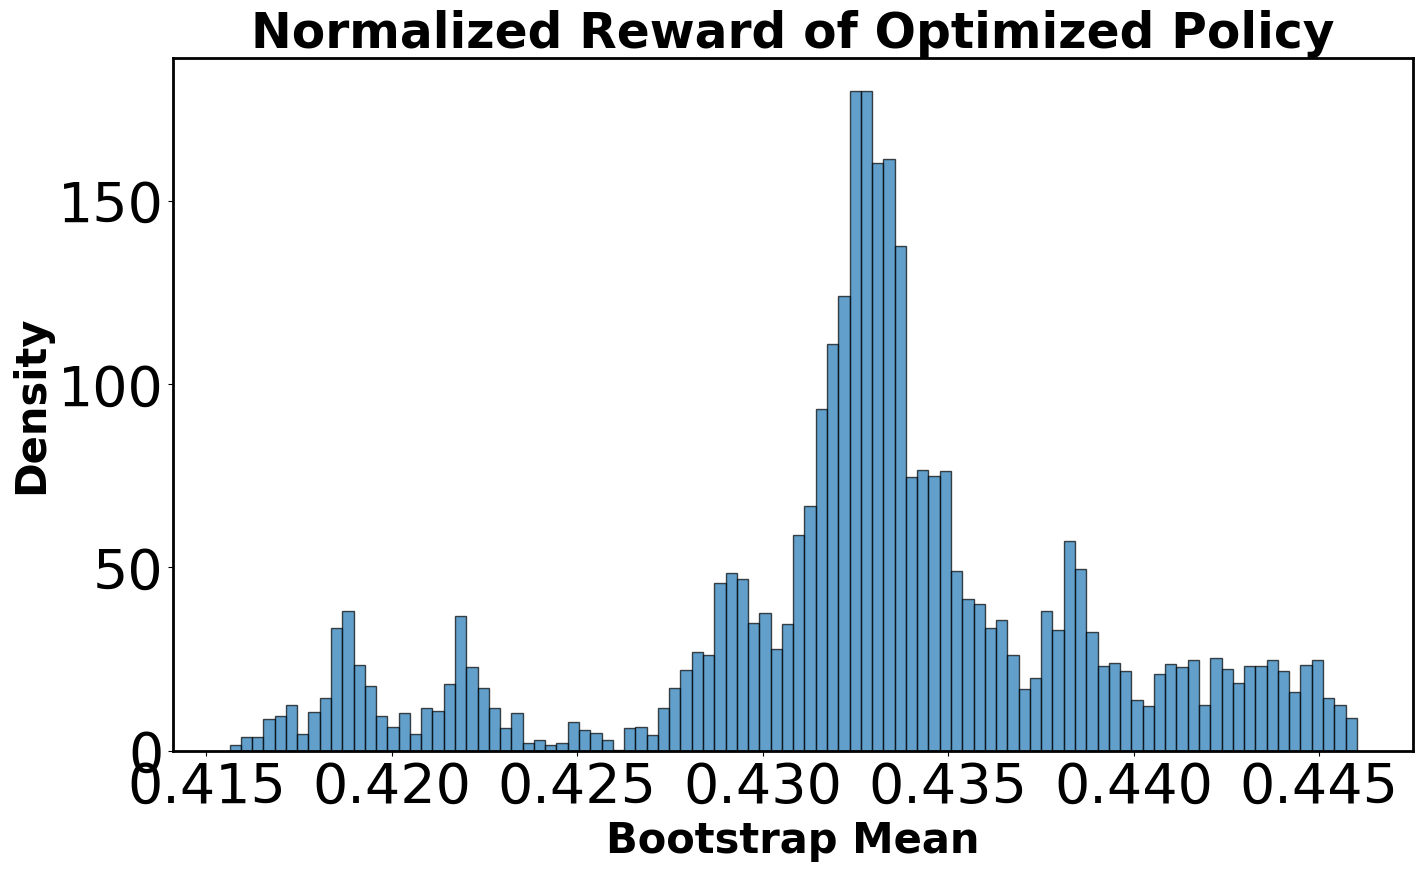

In [16]:
plt.hist(bootstrap_means, bins=100, density=True, alpha=0.7, edgecolor='k')
# plt.axvline(lower_bound, color='red', linestyle='--', label=f'90% Lower Bound: {lower_bound:.3f}')
plt.xlabel('Bootstrap Mean', weight='bold',fontsize=30)
plt.ylabel('Density',weight='bold',fontsize=30)
plt.title('Normalized Reward of Optimized Policy', weight='bold',fontsize=35)
plt.xticks(weight='medium')
plt.yticks(weight='medium')
# plt.legend()
plt.show()

Confidence Interval

In [17]:

# Sample statistics
sample_mean = np.mean(bootstrap_means)
sample_std = np.std(bootstrap_means, ddof=1)  # use ddof=1 for sample standard deviation
n = len(bootstrap_means)
# 95% confidence level
alpha = 0.2
z_score = stats.norm.ppf(1 - alpha/2)  
# Margin of error
margin_error = z_score * (sample_std / np.sqrt(n))
# Confidence interval
ci_lower = sample_mean - margin_error
print(ci_lower)

0.43281902804883543


16.605049505380453 16.86286427709981


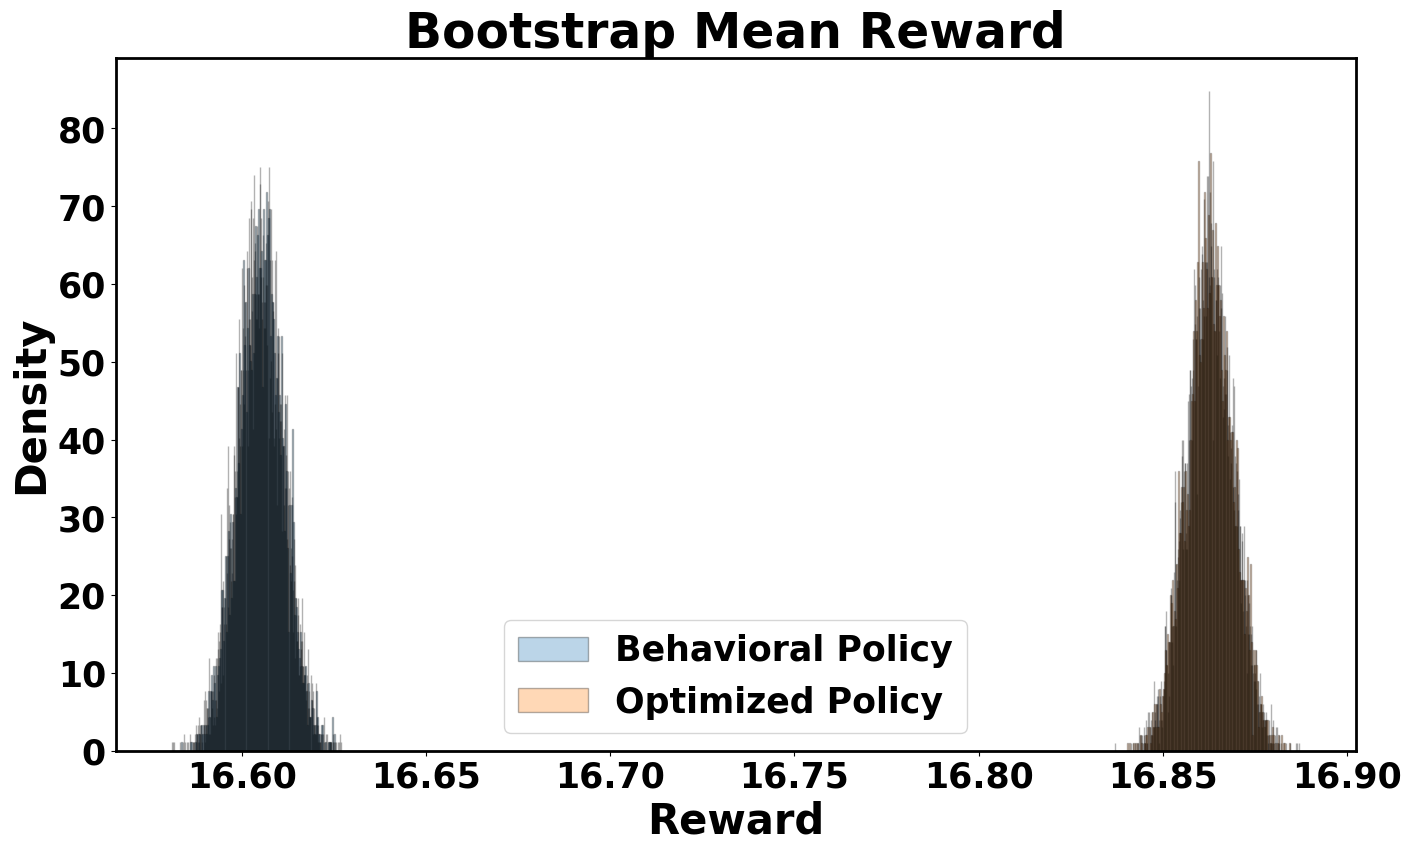

In [38]:
import numpy as np
import scipy.stats as stats
import tqdm
import os
import matplotlib.pyplot as plt
# plt.rcParams['mathtext.fontset'] = 'stix'
# plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['font.size'] = 25
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.linewidth"] = 2


base_return_list = np.loadtxt("./return_list.txt")
evaluation_return_list = np.loadtxt("./return_list_optimized.txt")
print(np.mean(base_return_list),np.mean(evaluation_return_list))

# Parameters
n_bootstrap = 10000  # Number of bootstrap samples
n_samples = 400000  # Size of each bootstrap sample (same as original dataset)

# Perform bootstrap resampling
base_bootstrap_means = []
eval_bootstrap_means = []
for _ in range(n_bootstrap):
    sample_base = np.random.choice(base_return_list, size=n_samples, replace=True)  # Resample with replacement
    sample_eval = np.random.choice(evaluation_return_list, size=n_samples, replace=True)  # Resample with replacement
    base_bootstrap_means.append(np.mean(sample_base))
    eval_bootstrap_means.append(np.mean(sample_eval))

# Convert to NumPy array for convenience
base_bootstrap_means = np.array(base_bootstrap_means)
eval_bootstrap_means = np.array(eval_bootstrap_means)

# Plot the bootstrap distributions
plt.hist(base_bootstrap_means, bins=500, density=True, alpha=0.3, edgecolor='k',label='Behavioral Policy')
plt.hist(eval_bootstrap_means, bins=500, density=True, alpha=0.3, edgecolor='k',label='Optimized Policy')
# plt.axvline(lower_bound, color='red', linestyle='--', label=f'90% Lower Bound: {lower_bound:.3f}')
plt.xlabel('Reward', weight='bold',fontsize=30)
plt.ylabel('Density',weight='bold',fontsize=30)
plt.title('Bootstrap Mean Reward', weight='bold',fontsize=35)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend()
plt.show()

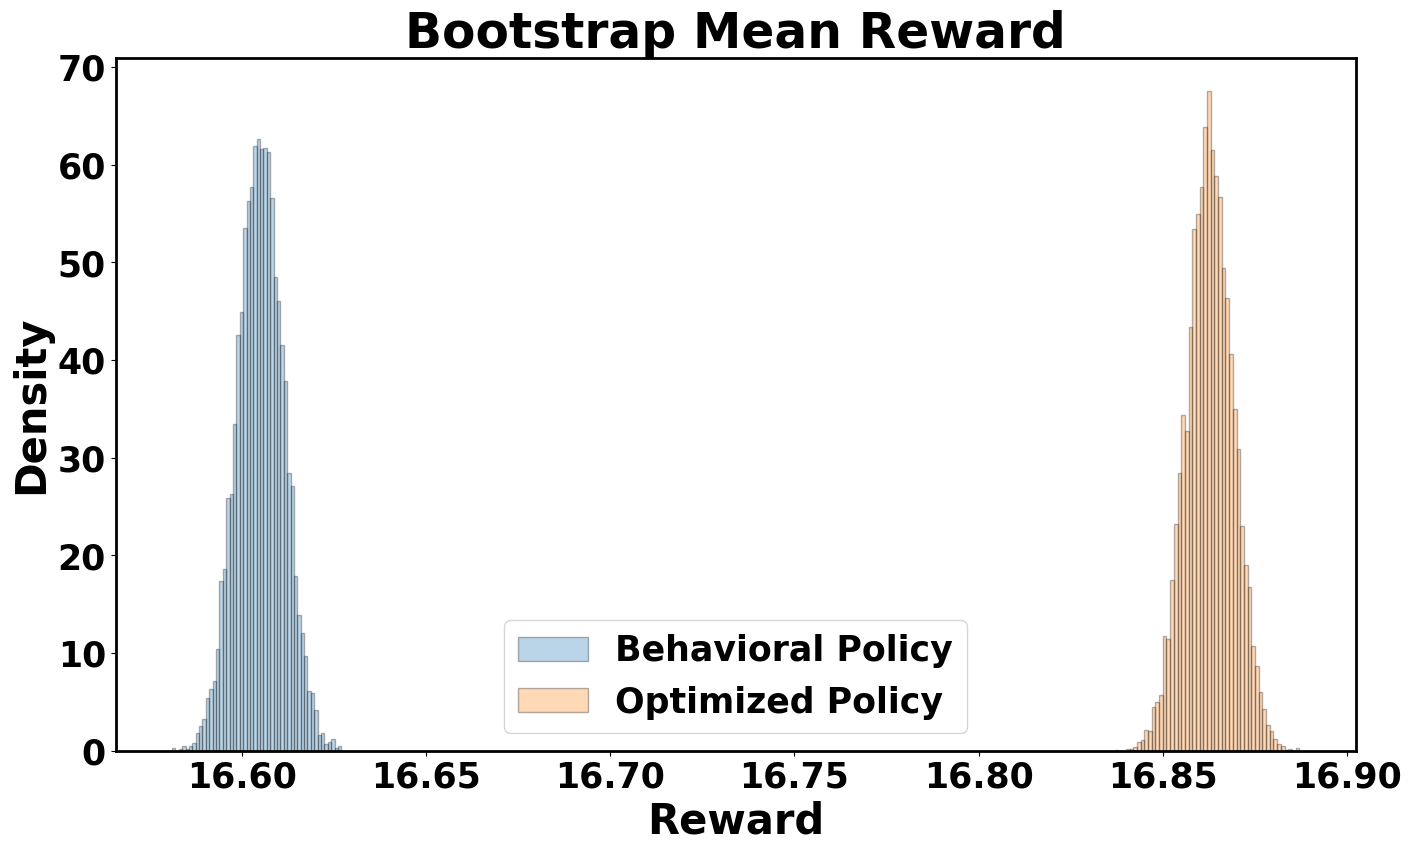

In [40]:
plt.hist(base_bootstrap_means, bins=50, density=True, alpha=0.3, edgecolor='k',label='Behavioral Policy')
plt.hist(eval_bootstrap_means, bins=50, density=True, alpha=0.3, edgecolor='k',label='Optimized Policy')
# plt.axvline(lower_bound, color='red', linestyle='--', label=f'90% Lower Bound: {lower_bound:.3f}')
plt.xlabel('Reward', weight='bold',fontsize=30)
plt.ylabel('Density',weight='bold',fontsize=30)
plt.title('Bootstrap Mean Reward', weight='bold',fontsize=35)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend()
plt.show()